In [4]:
from google.colab import files
files.upload()  # Select kaggle.json from your downloads

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"itsshresth","key":"21e112b450e46acd099d8d73d15f336a"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Now download the dataset
!kaggle datasets download -d srivarshan53/fashion-image-data

# Unzip the dataset
!unzip fashion-image-data.zip -d fashion_dataset

Dataset URL: https://www.kaggle.com/datasets/srivarshan53/fashion-image-data
License(s): apache-2.0
  0% 0.00/8.33M [00:00<?, ?B/s]
100% 8.33M/8.33M [00:00<00:00, 787MB/s]
Archive:  fashion-image-data.zip
  inflating: fashion_dataset/women fashion/Anarkali suit with a modern twist.jpg  
  inflating: fashion_dataset/women fashion/Anarkali suit with fitted bodice with a high neckline.jpg  
  inflating: fashion_dataset/women fashion/Latest-Party-Wear-One-Piece-Gown-For-Women.webp  
  inflating: fashion_dataset/women fashion/Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp  
  inflating: fashion_dataset/women fashion/Women-off-the-shoulder-sexy-embroidery-fashion-party-dress-1.png  
  inflating: fashion_dataset/women fashion/anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg  
  inflating: fashion_dataset/women fashion/anarkali suit with intricate silver embellishme

In [7]:
# Check what got extracted
!ls /content

fashion_dataset		kaggle.json  women_fashion
fashion-image-data.zip	sample_data


In [8]:
!ls '/content/fashion_dataset'

'women fashion'


In [9]:
image_dir = '/content/fashion_dataset/women fashion'
image_files = os.listdir(image_dir)
print(f"Total images: {len(image_files)}")
print("Sample files:", image_files[:5])

Total images: 96
Sample files: ['white, intricately detailed top and a flowing dark blue skirt.jpg', 'classic black slip dress with a midi length.jpg', 'chic and elegant outfit consisting of a pair of high-waisted wide-leg trousers paired with a long-sleeve sheer lace top.jpg', 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg']


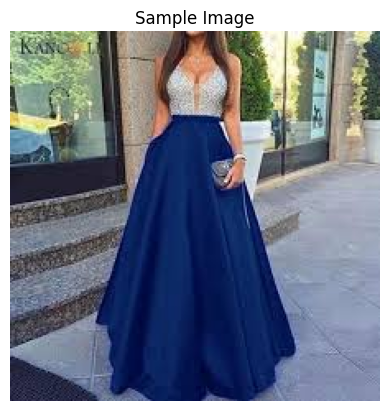

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Correct image directory
image_dir = '/content/fashion_dataset/women fashion'

# Get image file list
image_files = os.listdir(image_dir)

# Function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Sample Image")
    plt.show()

# Show the first image
first_image_path = os.path.join(image_dir, image_files[0])
display_image(first_image_path)

In [15]:
import glob

# directory path containing your images
image_directory = '/content/fashion_dataset/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/fashion_dataset/women fashion/white, intricately detailed top and a flowing dark blue skirt.jpg', '/content/fashion_dataset/women fashion/classic black slip dress with a midi length.jpg', '/content/fashion_dataset/women fashion/chic and elegant outfit consisting of a pair of high-waisted wide-leg trousers paired with a long-sleeve sheer lace top.jpg', '/content/fashion_dataset/women fashion/anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', '/content/fashion_dataset/women fashion/metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg', '/content/fashion_dataset/women fashion/floral dress with long sleeves.jpeg', '/content/fashion_dataset/women fashion/well-fitted beige suit.jpg', '/content/fashion_dataset/women fashion/black floral saree.jpg', '/content/fashion_dataset/women fashion/flowing green off-shoulder dress.jpg', '/content/fashion_dataset/women fashion/long, elegant, teal dress with a high s

In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━

In [17]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


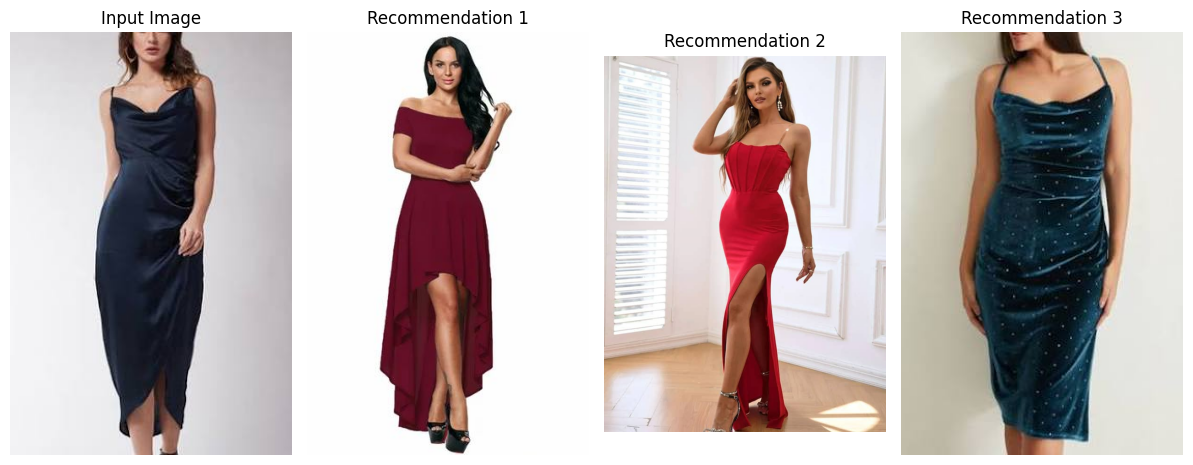

In [19]:
input_image_path = '/content/fashion_dataset/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

In [20]:
from google.colab import files
uploaded = files.upload()

# Get uploaded image path
input_image_path = list(uploaded.keys())[0]
print("Uploaded:", input_image_path)

Saving check.jpg to check.jpg
Uploaded: check.jpg


In [21]:
preprocessed_img = preprocess_image(input_image_path)
input_features = extract_features(model, preprocessed_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


In [22]:
from scipy.spatial.distance import cosine
import numpy as np

# Compute similarities
similarities = [1 - cosine(input_features, f) for f in all_features]
most_similar_index = np.argmax(similarities)
similar_image_name = all_image_names[most_similar_index]

print("Most similar image:", similar_image_name)

Most similar image: anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg


In [23]:
import os

# Clean up filename to create search query
query = os.path.splitext(similar_image_name)[0]
query = query.replace("-", " ").replace("_", " ").replace(",", " ")
print("Search query:", query)

Search query: anarkali suit with lavender in color with intricate white patterns throughout the fabric


In [24]:
!pip install icrawler

from icrawler.builtin import GoogleImageCrawler

def google_image_search(query, output_dir='/content/google_results', max_num=5):
    crawler = GoogleImageCrawler(storage={'root_dir': output_dir})
    crawler.crawl(keyword=query, max_num=max_num)

    # Get file paths
    return [
        os.path.join(output_dir, fname)
        for fname in os.listdir(output_dir)
        if fname.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

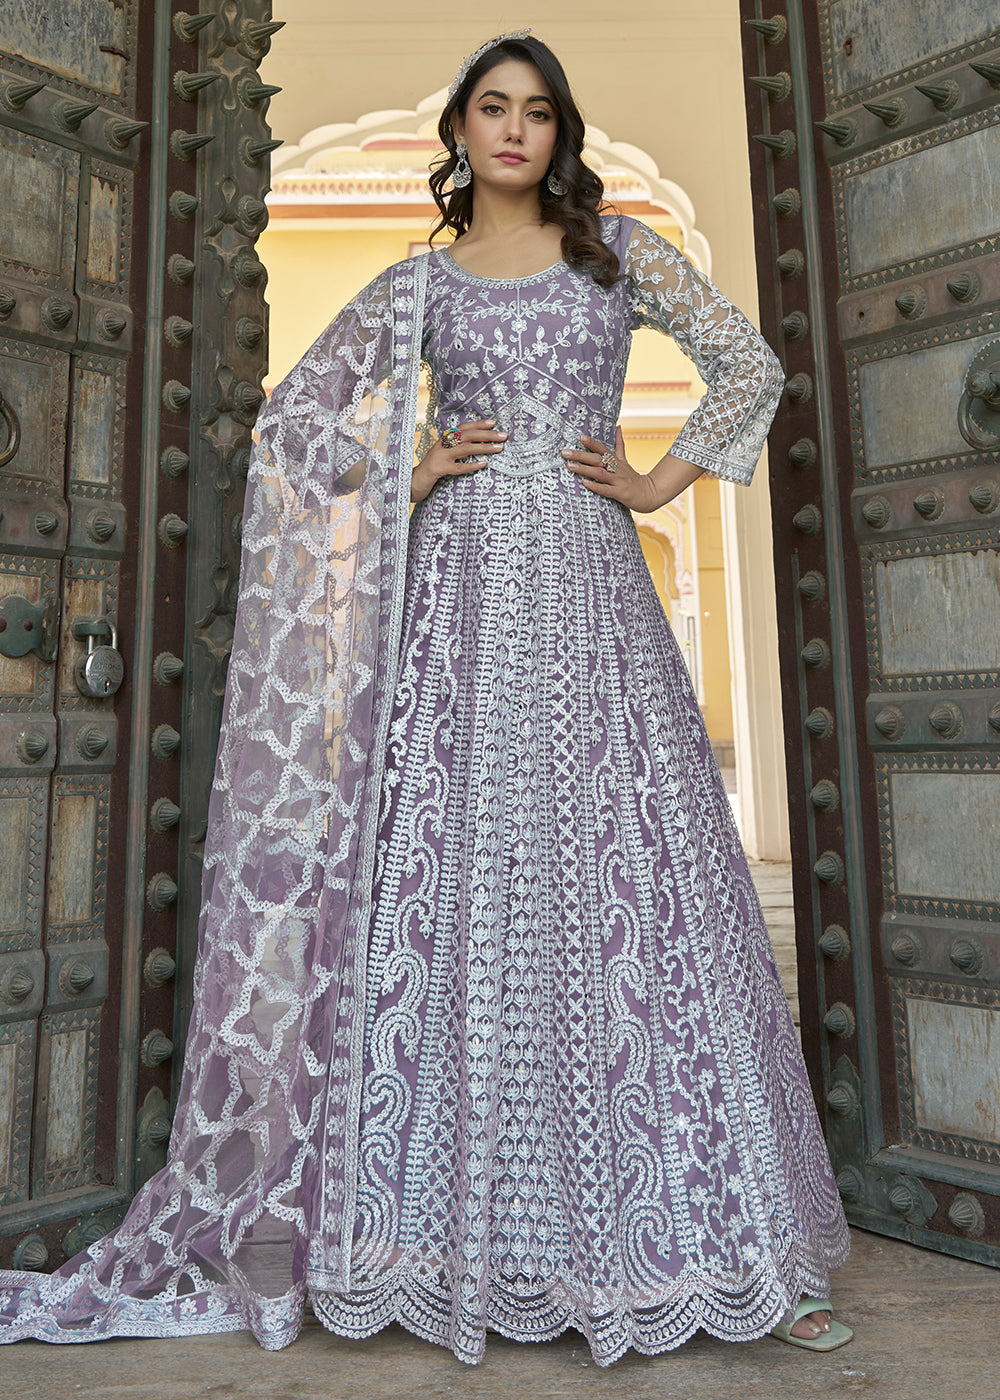

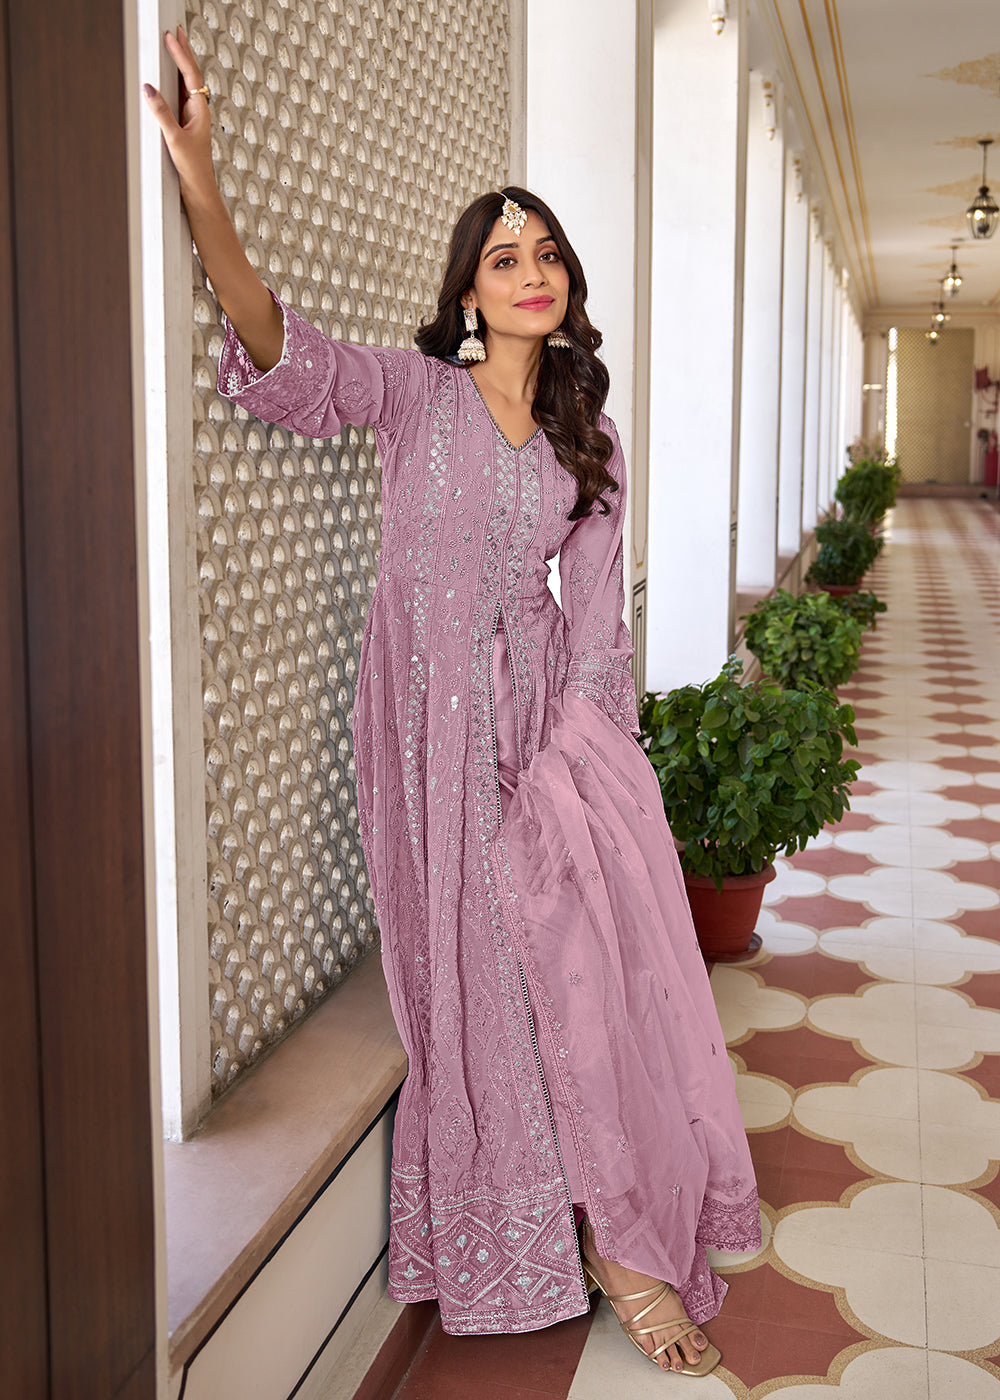

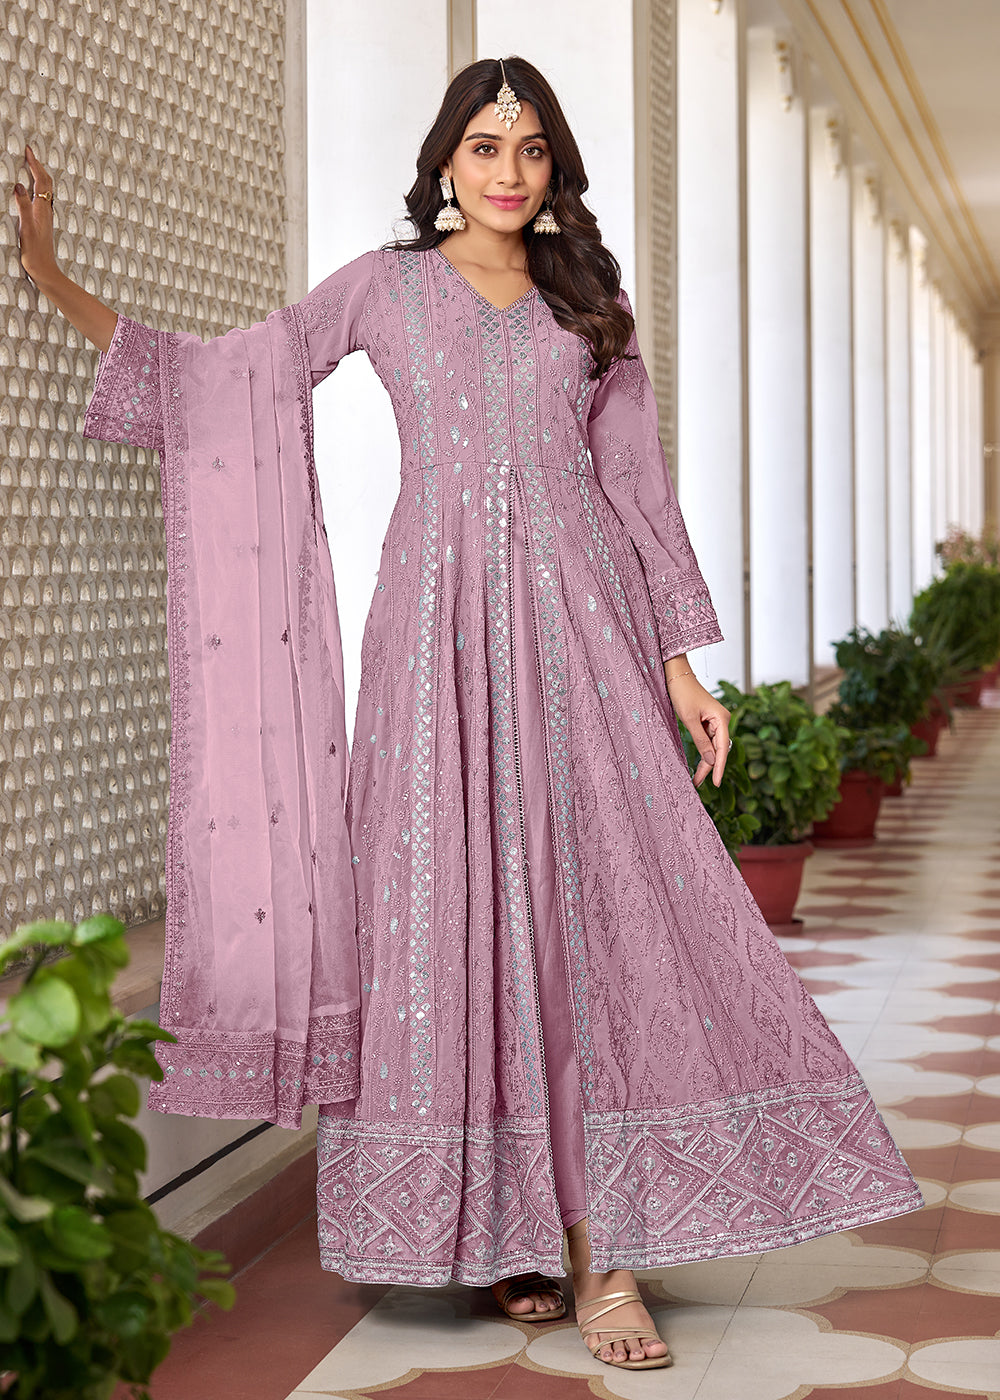

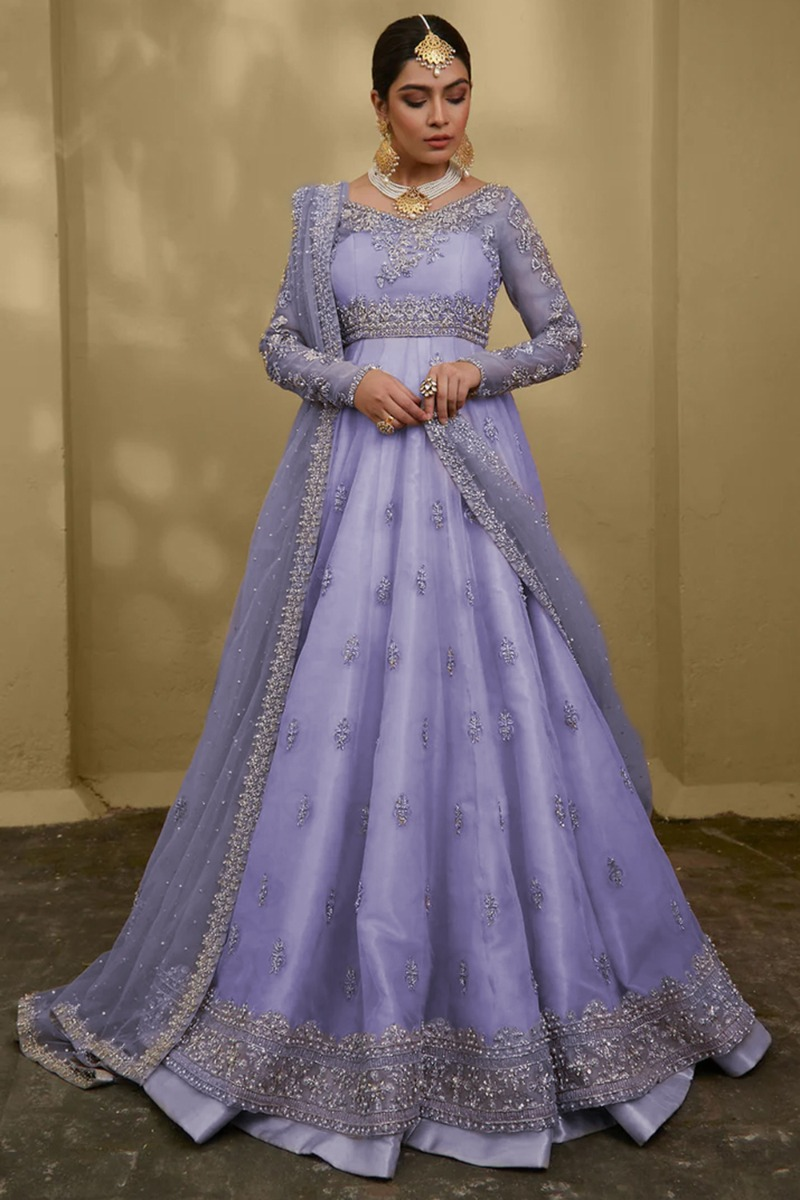

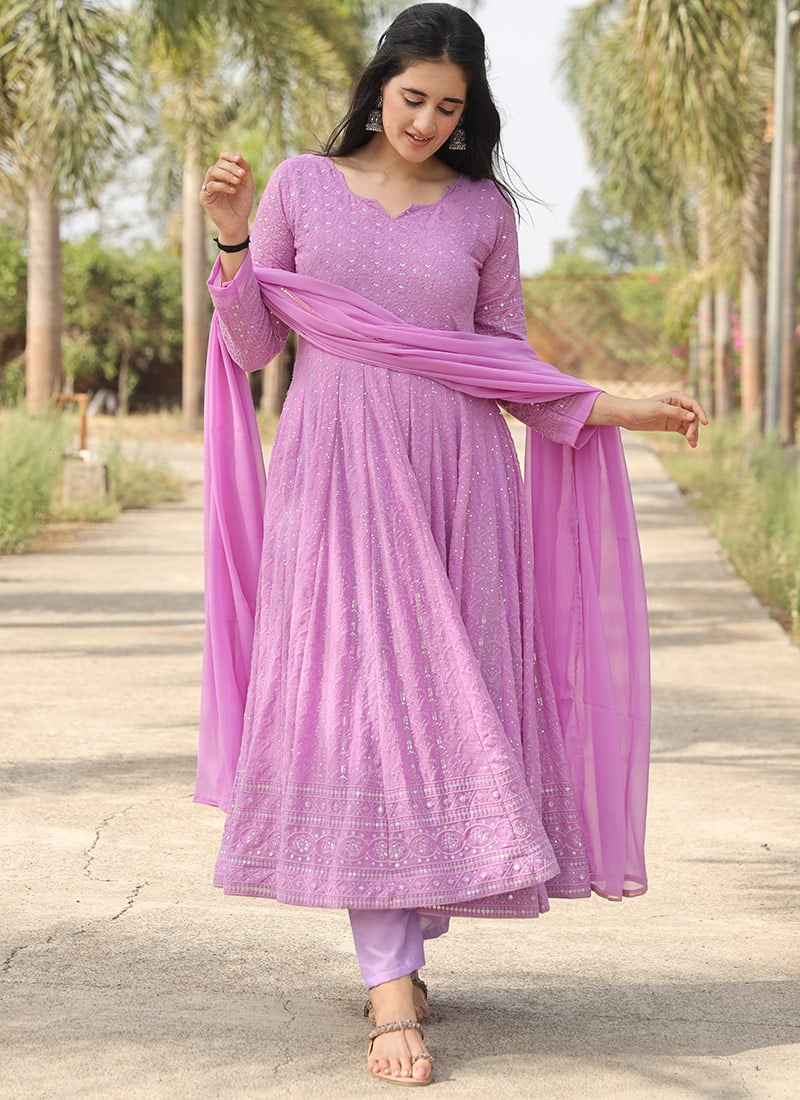

In [25]:
from IPython.display import display, Image as IPImage

downloaded_images = google_image_search(query, max_num=5)

for img in downloaded_images:
    display(IPImage(filename=img))

In [26]:
import gradio as gr
from PIL import Image as PILImage
import os
import numpy as np
from scipy.spatial.distance import cosine
from icrawler.builtin import GoogleImageCrawler

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

def google_image_search(query, output_dir='/content/google_results', max_num=5):
    os.makedirs(output_dir, exist_ok=True)
    crawler = GoogleImageCrawler(storage={'root_dir': output_dir})
    crawler.crawl(keyword=query, max_num=max_num)
    return sorted([
        os.path.join(output_dir, fname)
        for fname in os.listdir(output_dir)
        if fname.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])

def get_similar_fashion(input_img):
    input_path = "/content/input_user_image.jpg"
    input_img.save(input_path)

    # Extract features
    preprocessed_img = preprocess_image(input_path)
    input_features = extract_features(model, preprocessed_img)

    # Find most similar image
    similarities = [1 - cosine(input_features, f) for f in all_features]
    most_similar_index = np.argmax(similarities)
    similar_image_name = all_image_names[most_similar_index]

    # Build query
    query = os.path.splitext(similar_image_name)[0]
    query = query.replace("-", " ").replace("_", " ").replace(",", " ")

    # Get Google images
    downloaded_images = google_image_search(query)

    return downloaded_images[:4]  # Return top 4 images

# Gradio UI
demo = gr.Interface(
    fn=get_similar_fashion,
    inputs=gr.Image(type="pil", label="Upload a Fashion Image"),
    outputs=[gr.Image(label=f"Recommendation {i+1}") for i in range(4)],
    title="Fashion Recommender using Deep Learning + Google Search",
    description="Upload a fashion image to find visually similar styles from the web"
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://570b882709f337c34a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
